In [1]:
import requests
import numpy as np
from datetime import datetime, timezone

In [2]:
def fetch_ohlcv(url, key):
    headers = { "X-CoinAPI-Key": f"{key}" }  # Replace with your API key
 
    response = requests.get(url, headers=headers)
 
    # Check if the response is successful
    if response.status_code == 200:
        if response.content:
            return response.json()
        else:
            print("Response is empty.")
            return None
    else:
        # Handle other HTTP status codes
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

In [3]:
keys = [
    "F8B59CCC-B902-421A-A6D1-E2769B157C94",
    "46CDA826-99D7-482A-8D40-855AEF0D0BAA",
    "ACF2BF76-D88D-41DC-9FC0-470DC668BD68",
    "BFF4523C-4CE8-4BC8-AD95-1F46A429C35B",
    "FE93F9AF-DE0A-4090-B45D-2B194320E8AE",
    "ACDB03AA-EB7F-4730-A0FF-B27F5248D691",
    "71C13C40-4BE5-452F-B54B-FF8C0CDEC8C6",
    "E3E26230-DC30-48F1-AFDC-23DA73AD9954",
    "00C66DD9-04C7-461E-BE71-A9356C708407",
    "80AE8A57-6D9D-45E4-9D7A-AAA5644F09EC",
    "69CC131A-E2B8-4CC9-88F0-90D39692EF27",
    "6A6CD8E1-C6F7-4EEF-968D-E8A83E94CF76",
    "ECB8B448-FD50-4213-8B5E-7A1FDC27C3E7",
    "3558A7E8-36B5-4DE1-B080-9A0B9D83D563",
    "A97F1A3D-13BC-4631-B4A8-B6A29C07A570",
    "D9D1FD85-A55F-4705-BDF6-009536F0648F",
    "E6532654-0BE4-42A6-A020-5BFA5475F632",
    "D121A81E-BBDF-4951-A78B-28D2C125CFC1",
    "73F243B6-4022-459D-B40F-0DE193FCD064",
    "B60C81C4-0DFB-4F00-9B66-8CBA399B603A",
    "FD05CEC8-45DE-4EFC-BD78-BF485B4D912A",
    "A939101A-1908-480F-A796-3121A5849B11",
    "59188915-5BCE-4E17-A605-25D59D01626C",
    "92C8F755-8E42-4CE9-810A-ECB6C19CF6E0",
    "4A2B28E5-01AA-4670-B2E8-88A9F3971524",
    "5C0E4249-43B5-4F56-B37C-3067AD4E1772",
    "47E19D03-5698-4EB1-BC59-1ADB7E0FE408",
    "5C8B7151-A2D7-49B1-89F3-A97250B49ED7",
    "763746C4-5E3B-4CBD-A851-24E8893C06DC",
    "33DCE134-F824-49AB-B7DD-EB2A467E2429",
    "8DA5C30C-4AD9-491D-AE51-CD06F1DE9138",
    "A6E47D2F-F63F-47AC-908F-A210C9A0B01C",
    "7B7A39F3-9BEB-488C-8F4B-0C05137E4439",
    "0215C566-BD0B-4AC6-A42D-650EC43A4BFD",
    "5C6C9D37-DD00-4C8F-BF38-DBFF54984E24",
    "8DF9414A-8A72-4D44-8081-73FC8071F849",
    "D62BF9CC-A675-4218-93B5-D9B9DAAD1DD7",
    "B5EBF228-75A3-470B-8FCC-7CB38DC15EB3",
    "C6147775-02F8-445D-9032-B4E0AFAFD944",
    "9D3CF77A-330A-4654-8403-046112D3DCAB",
    "92880CE6-B949-47D6-8091-A85F1FA74B78",
    "4E63A66D-B725-4478-BA9B-031ABAB88EA6",
    "B6DEDFCE-D98E-4865-B18B-24A9D03E41D0",
    "26E2331E-AF53-41C9-80DB-1CCEA0B2ACAA",
    "D179CCB4-F30C-4AA1-B232-0F0FB7C3C68D",
    "0DC645B9-BF9D-432F-84A9-A7B5CAF5E20F",
    "66434D71-6A0A-4069-BB47-1274370C232E",
    "94F87054-2EB9-484C-825D-29BDD49AF06A",
    "9620361F-0269-424E-A30D-08A71325FAAA",
    "9D07A07E-0D59-4A23-B3EE-B4C36FB24BBD",
    "EDB63121-F5CE-4661-B852-7F8DC9C77EA4",
    "741F6AB7-776D-4A97-B5BC-B83C98278E6B",
    "7C68E3C9-0A7B-437E-9A43-543475890584",
    "D50B2826-B70D-44CA-B5CA-6482509D69EB",
    "7E208929-FF95-4B97-95F4-E048EE94FF92",
    "B4F82715-DC70-47AE-B584-4D0FC1E21D90",
    "8689958A-4C72-4332-8BB6-1956C69B1A98",
    "F418463C-6EFA-47F3-9582-5DBBA2AADF4D",
    "7695B0EA-5A06-46B6-B952-106543738BE0",
    "BA197AE9-4019-4C1F-AC8A-95E05A008880",
    "D6B12778-0665-407D-BB96-9BE49BB32474",
    "CCA2FE36-8C06-4F0C-87B3-3053EF01E6AD",
    "8DA8B16F-A3EE-4F41-80B8-4A260DEFD7BA",
    "A23CF69D-825C-48C8-AEE5-55BE2781D6C4",
    "25336050-331F-4159-9743-69BEB3C451D1",
    "EE28F4C5-8CB2-4DBC-B689-816107266571",
    "CE3E5865-F2F3-4E83-9D0F-529AEB615682",
    "D459EAD3-779D-450F-9DE0-656025AD7F63",
    "5BD1AAE1-2FE9-4D22-8C91-24E7E47360BA",
    "C2F69EC5-9AC2-40B6-AD45-3801EA4E710D",
    "8508682C-01D2-4478-95BB-6E3F6BBA0D41",
    "77B3794C-7FA3-4262-B6FA-F13F5C2CA83C"
]

In [5]:
import datetime
# minute resolution data
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 1, 1)
train_dates = []
for delta in range((end - start).days + 1):
    result_date = start + datetime.timedelta(days=delta)
    result_date = result_date.isoformat()
    train_dates.append(result_date)
print(train_dates[-1])

2023-01-01T00:00:00


In [115]:
# minute resolution data in 2023 for simulation
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 8, 28)
test_dates = []
for delta in range((end - start).days + 1):
    result_date = start + datetime.timedelta(days=delta)
    result_date = result_date.isoformat()
    test_dates.append(result_date)
print(test_dates[-1])

2023-08-28T00:00:00


In [6]:
import datetime
# second resolution data for simulation
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 9, 10)
second_dates = []
for delta in range(int((end - start).days*24 + 1)):
    result_date = start + datetime.timedelta(hours=delta)
    result_date = result_date.isoformat()
    second_dates.append(result_date)
print(len(second_dates))
print(second_dates[-10:])

6049
['2023-09-09T15:00:00', '2023-09-09T16:00:00', '2023-09-09T17:00:00', '2023-09-09T18:00:00', '2023-09-09T19:00:00', '2023-09-09T20:00:00', '2023-09-09T21:00:00', '2023-09-09T22:00:00', '2023-09-09T23:00:00', '2023-09-10T00:00:00']


In [140]:
(end - start).days

239

In [8]:

# Calculate the differences using range()
exchange = "BINANCEFTS"
limit = 4000
period = "1SEC"
key_index = 0
start_flag = False
data_t_start = []
data_t_end = []
data_price_open = []
data_price_high = []
data_price_low = []
data_price_close = []
data_volume = []
key = keys[0]
#last_date = np.load("data/BINANCE_PERP_2023_1SEC_t_start.npy")[-1]
dates = second_dates
for tt in range(len(dates)-1):
    time_start = dates[tt]
    time_end = dates[tt+1]
    #if time_start[5:7]==last_date[5:7] and time_start[8:10]==last_date[8:10]:
    start_flag = True
    if start_flag:
        url = f'https://rest.coinapi.io/v1/ohlcv/{exchange}_PERP_BTC_USDT/history?period_id={period}&time_start={time_start}&time_end={time_end}&limit={limit}'
        data = fetch_ohlcv(url, key)
        if data is None:
            key_index +=1
            key = keys[key_index]
            data =  fetch_ohlcv(url, key)
        for datapoint in data:
            data_t_start.append(datapoint["time_period_start"])
            data_t_end.append(datapoint["time_period_end"])
            data_price_open.append(datapoint["price_open"])
            data_price_high.append(datapoint["price_high"])
            data_price_low.append(datapoint["price_low"])
            data_price_close.append(datapoint["price_close"])
            data_volume.append(datapoint["volume_traded"])

Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Status code: 429
Failed to fetch data. Sta

IndexError: list index out of range

In [43]:
data_t_start_old = np.load("data/BINANCE_PERP_2023_1SEC_t_start.npy")
data_t_end_old = np.load("data/BINANCE_PERP_2023_1SEC_t_end.npy")
data_price_open_old = np.load("data/BINANCE_PERP_2023_1SEC_open.npy")
data_price_high_old = np.load("data/BINANCE_PERP_2023_1SEC_high.npy")
data_price_low_old = np.load("data/BINANCE_PERP_2023_1SEC_low.npy")
data_price_close_old = np.load("data/BINANCE_PERP_2023_1SEC_close.npy")
data_volume_old = np.load("data/BINANCE_PERP_2023_1SEC_volume.npy")

In [12]:

print(data_t_start[-1])

2023-06-23T13:59:59.0000000Z


In [53]:
data_t_start_new = np.concatenate((data_t_start_old, data_t_start[2716:]))
data_t_end_new = np.concatenate((data_t_end_old, data_t_end[2716:]))
data_price_open_new = np.concatenate((data_price_open_old, data_price_open[2716:]))
data_price_high_new = np.concatenate((data_price_high_old, data_price_high[2716:]))
data_price_low_new = np.concatenate((data_price_low_old, data_price_low[2716:]))
data_price_close_new = np.concatenate((data_price_close_old, data_price_close[2716:]))
data_volume_new = np.concatenate((data_volume_old, data_volume[2716:]))

In [9]:
np.save("data/BINANCE_PERP_2023_1SEC_t_start", data_t_start)
np.save("data/BINANCE_PERP_2023_1SEC_t_end", data_t_end)
np.save("data/BINANCE_PERP_2023_1SEC_open", data_price_open)
np.save("data/BINANCE_PERP_2023_1SEC_high", data_price_high)
np.save("data/BINANCE_PERP_2023_1SEC_low", data_price_low)
np.save("data/BINANCE_PERP_2023_1SEC_close", data_price_close)
np.save("data/BINANCE_PERP_2023_1SEC_volume", data_volume)

In [ ]:
close_data = np.load("data/BINANCE_PERP_close.npy")
low_data = np.load("data/BINANCE_PERP_low.npy")
high_data = np.load("data/BINANCE_PERP_high.npy")


In [56]:
start_data = np.load("data/BINANCE_PERP_t_start.npy")
print(len(start_data), start_data[0], start_data[-1])

1570435 2020-01-01T00:00:00.0000000Z 2022-12-31T23:59:00.0000000Z


In [186]:
data_vol = np.load("data/BINANCE_PERP_volume.npy")
np.save("data/BINANCE_PERP_volume_train", data_vol[:int(0.8*len(data_vol))])
np.save("data/BINANCE_PERP_volume_test", data_vol[int(0.8*len(data_vol)):])
'''print(len(close_data))
print(int(0.8*len(close_data)))
print(int(0.2*len(close_data)))
print(int(0.8*len(close_data))+int(0.2*len(close_data)))'''

'print(len(close_data))\nprint(int(0.8*len(close_data)))\nprint(int(0.2*len(close_data)))\nprint(int(0.8*len(close_data))+int(0.2*len(close_data)))'

tensor(536.9100, dtype=torch.float64)


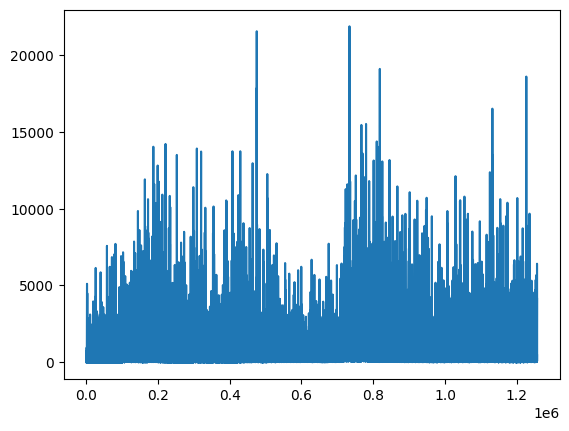

In [191]:
import torch
data_train = np.load("data/BINANCE_PERP_volume_train.npy")
data_test = np.load("data/BINANCE_PERP_volume_test.npy")
plt.plot(data_train)
print(torch.max(torch.tensor(data_train[0:720])))

In [99]:
data_t_start = []
data_t_end = []
data_price_open = []
data_price_high = []
data_price_low = []
data_price_close = []
data_volume = []
key = "67655C43-1D0F-475E-84B4-514065ACF468"
for tt in range(len(train_dates)-1):
    time_start = train_dates[tt]
    time_end = train_dates[tt+1]
    url = f'https://rest.coinapi.io/v1/ohlcv/{exchange}_PERP_BTC_USDT/history?period_id=1MIN&time_start={time_start}&time_end={time_end}&limit={limit}'
    data = fetch_ohlcv(url, key)
    print(type(data))
    if data is None:
        print("success")
    for datapoint in data:
        data_t_start.append(datapoint["time_period_start"])
        data_t_end.append(datapoint["time_period_end"])
        data_price_open.append(datapoint["price_open"])
        data_price_high.append(datapoint["price_high"])
        data_price_low.append(datapoint["price_low"])
        data_price_close.append(datapoint["price_close"])
        data_volume.append(datapoint["volume_traded"])

<class 'list'>
<class 'list'>
Failed to fetch data. Status code: 429
<class 'NoneType'>
success


TypeError: 'NoneType' object is not iterable

In [123]:
print(len(data_price_open))

631954


In [102]:
print(data_t_start[0], data_t_start[-1])

2020-01-01T00:00:00.0000000Z 2022-12-31T23:59:00.0000000Z


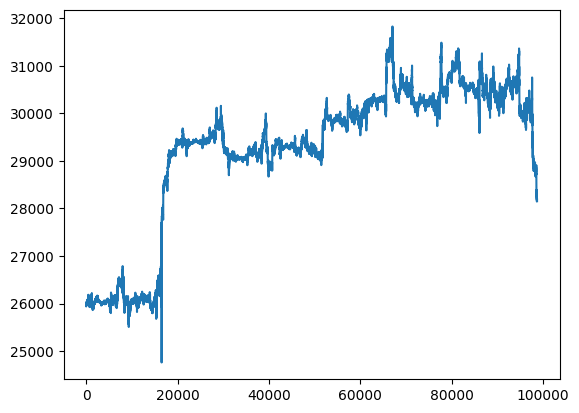

In [49]:
import matplotlib.pyplot as plt
plt.plot(data_open)

In [ ]:
import bitfinex
import numpy as np
import os
api_v2 = bitfinex.bitfinex_v2.api_v2()

In [ ]:
result = api_v2.candles()
print(len(result))

In [ ]:
import bitfinex
import datetime
import time
import pandas as pd

# Create api instance of the v2 API
api_v2 = bitfinex.bitfinex_v2.api_v2()

# Define query parameters
pair = 'BTCUSD' # Currency pair of interest
TIMEFRAME = '1m'#,'4h','1h','15m','1m'
mins = 1
# Define the start date
t_start = datetime.datetime(2019, 1, 1, 0, 0)
print(t_start)
t_start_ms = time.mktime(t_start.timetuple())*1000
print(t_start)

# Define the end date
t_stop = datetime.datetime(2023, 1, 1, 0, 0)
t_stop_ms = time.mktime(t_stop.timetuple())*1000

interval = (t_stop_ms-t_start_ms)/(1000*60*mins)
t_lim = t_start_ms+10000*1000*mins*60

all_data = []
# Download OHCL data from API
for tt in range(int((interval-interval%10000)/10000)):
    print(tt)
    if tt%40==39:
        time.sleep(60)
    result = api_v2.candles(symbol=pair, interval=TIMEFRAME, limit=10000, start=t_start_ms, end=t_lim)
    # Convert list of data to pandas dataframe
    names = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume']
    df = pd.DataFrame(result, columns=names)
    df['Date'] = pd.to_datetime(df['Date'], unit='ms')
    #print(df)

    # we can plot our downloaded data
    import matplotlib.pyplot as plt
    #plt.plot(df['Open'],'-')
    #plt.show()
    t_start_ms += 10000*1000*mins*60
    t_lim += 10000*1000*mins*60
    price_data = df["Close"].to_numpy()[:0:-1]
    print(price_data.shape)
    
    print(price_data[0],price_data[-1])
    all_data.append(price_data)
data = np.concatenate(all_data)
print(data[0], data[-1])

In [ ]:
print(data.shape)
if not os.path.exists("data"):
    os.makedirs("data")
file_n = "data/{}_price_data___start_{}-{}-{}_stop_{}-{}-{}".format(TIMEFRAME,t_start.year,t_start.month,t_start.day,t_stop.year,t_stop.month,t_stop.day)
print(file_n)
np.save(file_n, data)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)

In [2]:
### train test-split data ###
all_data = np.load("data/5m_price_data___start_2019-1-1_stop_2023-1-1.npy")
data_size = len(all_data)
np.save("data/train5m.npy", all_data[:int(data_size*0.8)])
np.save("data/test5m.npy", all_data[int(data_size*0.8):])

In [1]:
import cryptowatch as cw
import requests

In [2]:
cw.api_key = "LIF27S2KESB9FRQL98KY"

# Assets
url =  "https://api.cryptowat.ch/markets/kraken/btceur/price"
resp = requests.get(url)
print(dir(resp))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [ ]:
period = 86400
before = 1693260000
after = 1490840800
url = f"https://api.cryptowat.ch/markets/BINANCE/BTCUSDT/ohlc"
payload = {'limit' : 100, 'before' : before, 'after' : after, 'periods' : period}
#data = cw.markets.get("BINANCE:BTCUSDT", ohlc=True, before=before, after=after, periods=["1m"])
data = requests.get(url, params=payload)
#print(data.json())
#print(data.json()['result']['price'])

In [41]:

print(type(data))
print(data.json().keys())
#print(len(data.json()["result"]["1440"]))
print(len(data.json()["result"]["86400"]))

<class 'requests.models.Response'>
dict_keys(['result', 'allowance'])
2035


In [ ]:

for min in data._http_response.json()['result']['60']:
    print(min[0])